In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values

In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [7]:
label_1 = LabelEncoder()
X[:,1] = label_1.fit_transform(X[:,1])
label_2 = LabelEncoder()
X[:,2] = label_2.fit_transform(X[:,2])


In [8]:
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\tusha\Anaconda3\anaconda64\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\tusha\Anaconda3\anaconda64\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [11]:
X = X[:,1:]

In [12]:
X = pd.DataFrame(X)

In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [18]:
classifier = Sequential()

In [21]:
classifier.add(Dense(output_dim=6,activation='relu',init='uniform',input_dim=11))
classifier.add(Dense(output_dim=6,activation='relu',init='uniform'))
classifier.add(Dense(output_dim=1,activation='sigmoid',init='uniform'))

C:\Users\tusha\Anaconda3\anaconda64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\tusha\Anaconda3\anaconda64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\tusha\Anaconda3\anaconda64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
classifier.fit(X_train,y_train,epochs=100,batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 3s 425us/step - loss: 0.5137 - acc: 0.7961
Epoch 2/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4559 - acc: 0.7961
Epoch 3/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.4396 - acc: 0.7961
Epoch 4/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.4276 - acc: 0.7961
Epoch 5/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.4194 - acc: 0.7974
Epoch 6/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4141 - acc: 0.8249
Epoch 7/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.4106 - acc: 0.8329
Epoch 8/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.4074 - acc: 0.8335
Epoch 9/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4065 - acc: 0.8312
Epoch 10/100
8000/8000 [============================

8000/8000 [==============================] - 1s 146us/step - loss: 0.3915 - acc: 0.8437
Epoch 80/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.3913 - acc: 0.8407
Epoch 81/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.3911 - acc: 0.8425
Epoch 82/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.3912 - acc: 0.8421
Epoch 83/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.3914 - acc: 0.8439
Epoch 84/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.3913 - acc: 0.8397
Epoch 85/100
8000/8000 [==============================] - 1s 147us/step - loss: 0.3908 - acc: 0.8437
Epoch 86/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.3903 - acc: 0.8415
Epoch 87/100
8000/8000 [==============================] - 1s 154us/step - loss: 0.3906 - acc: 0.8424
Epoch 88/100
8000/8000 [==============================] - 1s 141us/step - loss: 0.3907 - acc: 0.8429
Epo

In [27]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = (y_pred>0.5)

In [31]:
cm = confusion_matrix(y_test,y_pred)

In [32]:
cm

array([[1531,   63],
       [ 268,  138]], dtype=int64)

In [33]:
import seaborn as sns

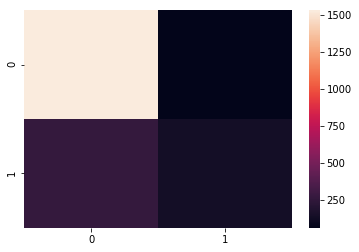

In [35]:
sns.heatmap(cm)

In [37]:
print('accuracy :',(1531+138)/2000)

accuracy : 0.8345
